In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import os

In [2]:
# https://github.com/rdkit/rdkit-tutorials/blob/master/notebooks/006_save_rdkit_mol_as_image.ipynb
# https://greglandrum.github.io/rdkit-blog/posts/2023-10-25-molsmatrixtogridimage.html
# https://github.com/rdkit/rdkit/issues/3093
# https://www.rdkit.org/docs/GettingStartedInPython.html

In [3]:
with open("test_reconstructions.txt", "r") as f:
    reconstructions = [pair.split(",") for pair in f.read().split("\n")]

/data5/jacob/anaconda3/envs/rdkit/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


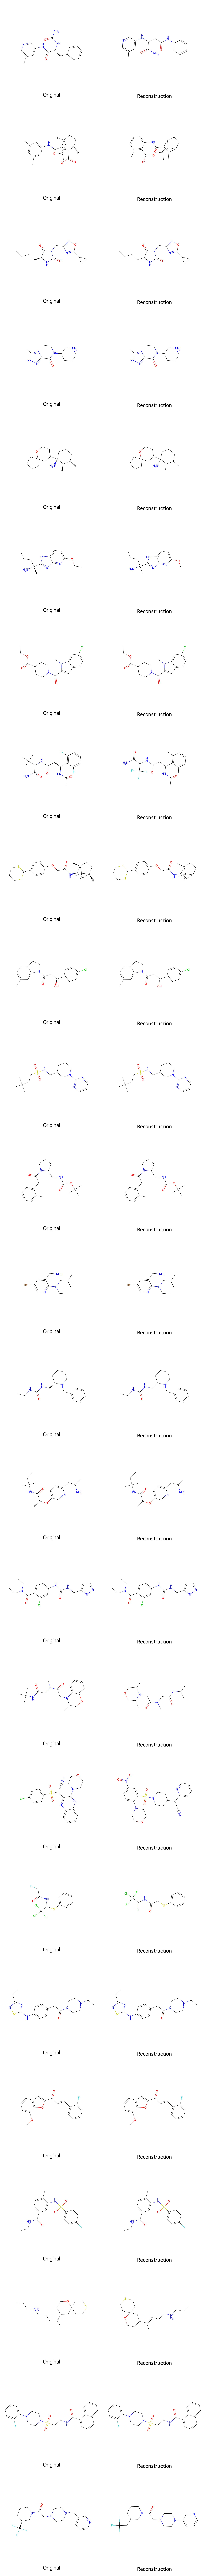

In [4]:
os.makedirs("reconstruction_visualizations", exist_ok=True)
npairs = len(reconstructions)
opts = Draw.MolDrawOptions()
opts.legendFraction = 0.1
opts.legendFontSize = 50
img = Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in sum(reconstructions[:npairs], [])], 
                           molsPerRow=2, 
                           subImgSize=(1000,1000), 
                           legends=["Original", "Reconstruction"] * npairs,
                           drawOptions=opts,
                           returnPNG=False)
img.save('reconstruction_visualizations/full_reconstructions.png') 
img

In [5]:
symbol_names = [('/', '_fs_'), ('\\', '_bs_'), ('#', '_pd_'), ('[', '_lb_'), (']', '_rb_'), ('(', '_lp_'), (')', '_rp_'), ('=', '_eq_'), ('@', '_at_'), ('+', '_pl_')]

def visualize_reconstruction(original_smile, reconstructed_smile, filename=None):
    original_mol, reconstructed_mol = Chem.MolFromSmiles(original_smile), Chem.MolFromSmiles(reconstructed_smile)
    if filename is None:
        filename = original_smile
        for sym, name in symbol_names:
            filename = filename.replace(sym, name)
    opts = Draw.MolDrawOptions()
    opts.legendFraction = 0.1
    opts.legendFontSize = 50
    img = Draw.MolsToGridImage([original_mol, reconstructed_mol],
                               molsPerRow=2,
                               subImgSize=(1000,1000),
                               legends=["Original", "Reconstruction"],
                               drawOptions=opts,
                               returnPNG=False)
    img.save(os.path.join('reconstruction_visualizations', f'{filename}.png'))

In [6]:
visualize_reconstruction(*reconstructions[0])

In [7]:
for i, (input_smile, recon_smile) in enumerate(reconstructions):
    visualize_reconstruction(input_smile, recon_smile, f"recon{i}")

In [8]:
with open("recommendations.txt", "r") as f:
    recommendations = [pair.split(",") for pair in f.read().split("\n")]

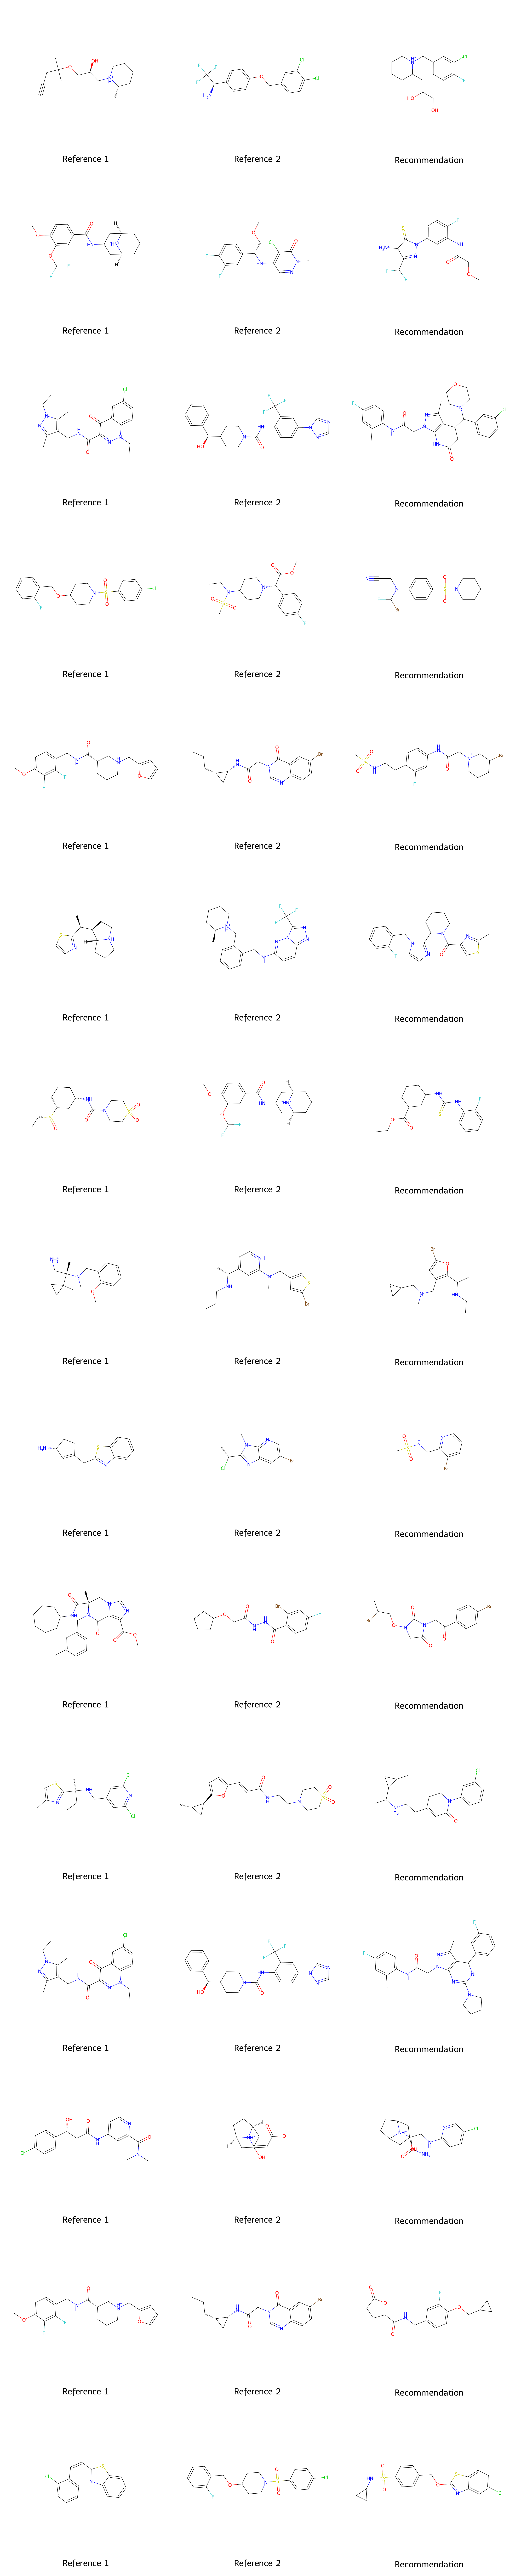

In [9]:
os.makedirs("recommendation_visualizations", exist_ok=True)
npairs = len(recommendations)
opts = Draw.MolDrawOptions()
opts.legendFraction = 0.1
opts.legendFontSize = 50
img = Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in sum(recommendations[:npairs], [])], 
                           molsPerRow=3, 
                           subImgSize=(1000,1000), 
                           legends=["Reference 1", "Reference 2", "Recommendation"] * npairs,
                           drawOptions=opts,
                           returnPNG=False)
img.save('recommendation_visualizations/full_recommendations.png') 
img

In [10]:
def visualize_recommendation(ref1_smile, ref2_smile, rec_smile, filename=None):
    ref1_mol, ref2_mol, rec_mol = Chem.MolFromSmiles(ref1_smile), Chem.MolFromSmiles(ref2_smile), Chem.MolFromSmiles(rec_smile)
    if filename is None:
        filename = ref1_smile + "--" + ref2_smile
        for sym, name in symbol_names:
            filename = filename.replace(sym, name)
    opts = Draw.MolDrawOptions()
    opts.legendFraction = 0.1
    opts.legendFontSize = 50
    img = Draw.MolsToGridImage([ref1_mol, ref2_mol, rec_mol],
                               molsPerRow=3,
                               subImgSize=(1000,1000),
                               legends=["Reference 1", "Reference 2", "Recommendation"],
                               drawOptions=opts,
                               returnPNG=False)
    filename = os.path.join('recommendation_visualizations', f'{filename}.png')
    img.save(filename)

In [11]:
visualize_recommendation(*recommendations[0], filename='rec0')

In [12]:
for i, (ref1_smile, ref2_smile, rec_smile) in enumerate(recommendations):
    visualize_recommendation(ref1_smile, ref2_smile, rec_smile, f"rec{i}")